In [1]:
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

#from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import PredictionErrorDisplay

from sklearn.decomposition import PCA

#from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic
pd.set_option('display.max_columns', 250)

In [2]:
df_geo = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_geo_features_spb.csv')
df_time = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_time_based_features_full.csv')
df_hex_unique = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_hex_unique_with_shares_spb.csv')
df_hex_total = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_hex_total_with_shares_spb.csv')

In [8]:
df_geo.shape, df_time.shape, df_hex_unique.shape, df_hex_total.shape

((3905, 43), (3892, 63), (3892, 68), (3892, 68))

In [8]:
#avaible_hexes = df_hex_unique[df_hex_unique['unique_visits'] > 50].h3_9.to_list()
#len(avaible_hexes)

avaible_hexes = df_hex_total[df_hex_total['total_visits'] > 150].h3_9.to_list()
len(avaible_hexes)

1310

In [9]:
df_hex_total = df_hex_total[df_hex_total['h3_9'].isin(avaible_hexes)]
df_hex_unique = df_hex_unique[df_hex_unique['h3_9'].isin(avaible_hexes)]
df_time = df_time[df_time['h3_9'].isin(avaible_hexes)]
df_geo = df_geo[df_geo['h3_9'].isin(avaible_hexes)]

df_geo.shape, df_time.shape, df_hex_unique.shape, df_hex_total.shape

((1310, 43), (1310, 63), (1310, 68), (1310, 68))

**check for diploma presentation**

In [10]:
df_time.columns

Index(['h3_9', 'avg_duration_hrs', 'median_duration_hrs', 'weekday_visits',
       'weekend_visits', 'Stay0_05h', 'Stay05_1h', 'Stay1_3h', 'Stay3_6h',
       'Stay6_9h', 'Stay9_15h', 'Stay15_20h', 'Stay20_plus', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'day', 'evening', 'morning', 'night', 'weekday_visits_share',
       'weekend_visits_share', 'Stay0_05h_share', 'Stay05_1h_share',
       'Stay1_3h_share', 'Stay3_6h_share', 'Stay6_9h_share', 'Stay9_15h_share',
       'Stay15_20h_share', 'Stay20_plus_share', 'Friday_share', 'Monday_share',
       'Saturday_share', 'Sunday_share', 'Thursday_share', 'Tuesday_share',
       'Wednesday_share', 'day_share', 'evening_share', 'morning_share',
       'night_share', 'avg_duration_hrs_per_unique',
       'median_duration_hrs_per_unique', 'Stay0_05h_per_unique',
       'Stay05_1h_per_unique', 'Stay1_3h_per_unique', 'Stay3_6h_per_unique',
       'Stay6_9h_per_unique', 'Stay9_15h_per_unique', 'Stay15

In [11]:
df_hex_unique.carsharing_user_unique_share.mean()

0.19213901677292886

In [12]:
df_hex_unique.age_40_60_unique_share.mean()

0.43026745242735415

In [13]:
df_time.evening_share.mean()

0.21250800932655273

**continue**

In [6]:
df_geo = df_geo.drop(columns=['name'])

In [6]:
df_geo = pd.get_dummies(df_geo, columns=['name'])

In [7]:
df_geo.head(3)

,h3_9,building_count,highway_count,footway_count,amenity_count,apartments_count,detached_count,dormitory_count,hotel_count,house_count,semidetached_house_count,terrace_count,commercial_count,office_count,retail_count,train_station_count,bus_stop_count,crossing_count,cafe_count,fast_food_count,restaurant_count,college_count,language_school_count,school_count,university_count,atm_count,bank_count,clinic_count,hospital_count,pharmacy_count,theatre_count,townhall_count,bench_count,amount_unqiue_vehicles,unique_vehicle_stops,unique_stops,bus_stop_counter,tram_stop_counter,trolleybus_stop_counter,unique_clubs_names,unique_clubs_sortes,total_fit_clubs,name_Адмиралтейский район,name_Василеостровский район,name_Выборгский район,name_Калининский район,name_Кировский район,name_Красногвардейский район,name_Красносельский район,name_Московский район,name_Невский район,name_Петроградский район,name_Приморский район,name_Пушкинский район,name_Фрунзенский район,name_Центральный район
0,8911060006bffff,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,89110600077ffff,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,89110600113ffff,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**drop income related variable (unique visits) from df_hex_total before join, to avoid data leak**

In [12]:
df_hex_unique = df_hex_unique.drop(columns=['salary_1_unique',
       'salary_2_unique', 'salary_3_unique', 'salary_4_unique',
       'salary_5_unique'])

In [13]:
df_model_short = pd.merge(df_hex_unique, df_time,
                                how='left', left_on='h3_9', right_on='h3_9')

In [14]:
df_model_short = pd.merge(df_model_short, df_geo,
                                how='left', left_on='h3_9', right_on='h3_9')

**drop income related variable from df_hex_total before join, to avoid data leak**

In [15]:
df_hex_total = df_hex_total.drop(columns=['salary_1_total','salary_2_total',
                                          'salary_3_total', 'salary_4_total', 'salary_5_total',
                                         
                                          'salary_1_total_share', 'salary_2_total_share',
                                          'salary_3_total_share', 'salary_4_total_share', 'salary_5_total_share'])

In [16]:
df_model_short = pd.merge(df_model_short, df_hex_total,
                                how='left', left_on='h3_9', right_on='h3_9')

In [17]:
df_model_short.shape

(1223, 237)

In [25]:
df_model_short = df_model_short.set_index('h3_9')

In [26]:
df_model_short.head(3)

,unique_visits,car_owners_unique,carsharing_user_unique,not_citizen_rf_unique,healthy_food_inter_unique,public_trnsprt_user_unique,pharmacies_inter_unique,beauty_salon_inter_unique,elite_sports_inter_unique,sprtswr_ftwr_inter_unique,sprt_good_inter_unique,trvl_rus_unique,trvl_abrd_unique,sprt_fit_inter_unique,hunting_fishing_inter_unique,fashion_inter_unique,coffee_inter_unique,med_serv_inter_unique,education_inter_unique,delivery_inter_unique,markets_inter_unique,no_children_unique,age_20_unique,age_20_30_unique,age_30_40_unique,age_40_60_unique,age_60_unique,male_unique,female_unique,car_owners_unique_share,carsharing_user_unique_share,not_citizen_rf_unique_share,healthy_food_inter_unique_share,public_trnsprt_user_unique_share,pharmacies_inter_unique_share,beauty_salon_inter_unique_share,elite_sports_inter_unique_share,sprtswr_ftwr_inter_unique_share,sprt_good_inter_unique_share,trvl_rus_unique_share,trvl_abrd_unique_share,sprt_fit_inter_unique_share,hunting_fishing_inter_unique_share,fashion_inter_unique_share,coffee_inter_unique_share,med_serv_inter_unique_share,education_inter_unique_share,delivery_inter_unique_share,markets_inter_unique_share,no_children_unique_share,age_20_unique_share,age_20_30_unique_share,age_30_40_unique_share,age_40_60_unique_share,age_60_unique_share,male_unique_share,female_unique_share,salary_1_unique_share,salary_2_unique_share,salary_3_unique_share,salary_4_unique_share,salary_5_unique_share,avg_duration_hrs,median_duration_hrs,weekday_visits,weekend_visits,Stay0_05h,Stay05_1h,Stay1_3h,Stay3_6h,Stay6_9h,Stay9_15h,Stay15_20h,Stay20_plus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,day,evening,morning,night,weekday_visits_share,weekend_visits_share,Stay0_05h_share,Stay05_1h_share,Stay1_3h_share,Stay3_6h_share,Stay6_9h_share,Stay9_15h_share,Stay15_20h_share,Stay20_plus_share,Friday_share,Monday_share,Saturday_share,Sunday_share,Thursday_share,Tuesday_share,Wednesday_share,day_share,evening_share,morning_share,night_share,avg_duration_hrs_per_unique,median_duration_hrs_per_unique,Stay0_05h_per_unique,Stay05_1h_per_unique,Stay1_3h_per_unique,Stay3_6h_per_unique,Stay6_9h_per_unique,Stay9_15h_per_unique,Stay15_20h_per_unique,Stay20_plus_per_unique,Stay0_05h_per_unique_share_per_unique,Stay05_1h_per_unique_share_per_unique,Stay1_3h_per_unique_share_per_unique,Stay3_6h_per_unique_share_per_unique,Stay6_9h_per_unique_share_per_unique,Stay9_15h_per_unique_share_per_unique,Stay15_20h_per_unique_share_per_unique,Stay20_plus_per_unique_share_per_unique,building_count,highway_count,footway_count,amenity_count,apartments_count,detached_count,dormitory_count,hotel_count,house_count,semidetached_house_count,terrace_count,commercial_count,office_count,retail_count,train_station_count,bus_stop_count,crossing_count,cafe_count,fast_food_count,restaurant_count,college_count,language_school_count,school_count,university_count,atm_count,bank_count,clinic_count,hospital_count,pharmacy_count,theatre_count,townhall_count,bench_count,amount_unqiue_vehicles,unique_vehicle_stops,unique_stops,bus_stop_counter,tram_stop_counter,trolleybus_stop_counter,unique_clubs_names,unique_clubs_sortes,total_fit_clubs,name_Адмиралтейский район,name_Василеостровский район,name_Выборгский район,name_Калининский район,name_Кировский район,name_Красногвардейский район,name_Красносельский район,name_Московский район,name_Невский район,name_Петроградский район,name_Приморский район,name_Пушкинский район,name_Фрунзенский район,name_Центральный район,total_visits,car_owners_total,carsharing_user_total,not_citizen_rf_total,healthy_food_inter_total,public_trnsprt_user_total,pharmacies_inter_total,beauty_salon_inter_total,elite_sports_inter_total,sprtswr_ftwr_inter_total,sprt_good_inter_total,trvl_rus_total,trvl_abrd_total,sprt_fit_inter_total,hunting_fishing_inter_total,fashion_inter_total,coffee_inter_total,med_serv_inter_total,education_inter_total,delivery_inter_total,markets_inter_total,no_children_total,age_20_total,age_20_30_total

In [36]:
df_model_short.salary_5_unique_share.median()

0.1595744680851064

In [37]:
df_model_short.salary_5_unique_share.mean()

0.1647266895675248

## Model itself

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import shap

Target: salary_1_unique_share
Best Model: RandomForestRegressor
Metrics: {'R2': 0.14511237189014192, 'MAE': 0.03548472627294063, 'MAPE': 21.514663133290952}


 95%|=================== | 291/306 [00:15<00:00]       

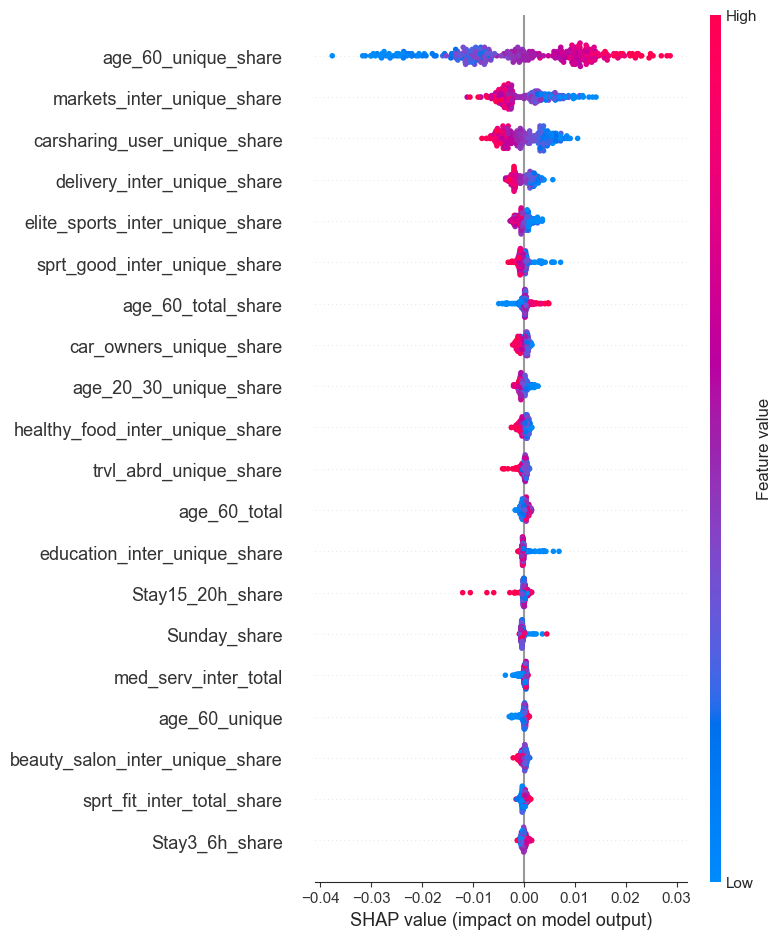

Target: salary_2_unique_share
Best Model: RandomForestRegressor
Metrics: {'R2': 0.19833303467693786, 'MAE': 0.03588819284660213, 'MAPE': 16.763331096801444}


 99%|===================| 303/306 [00:17<00:00]        

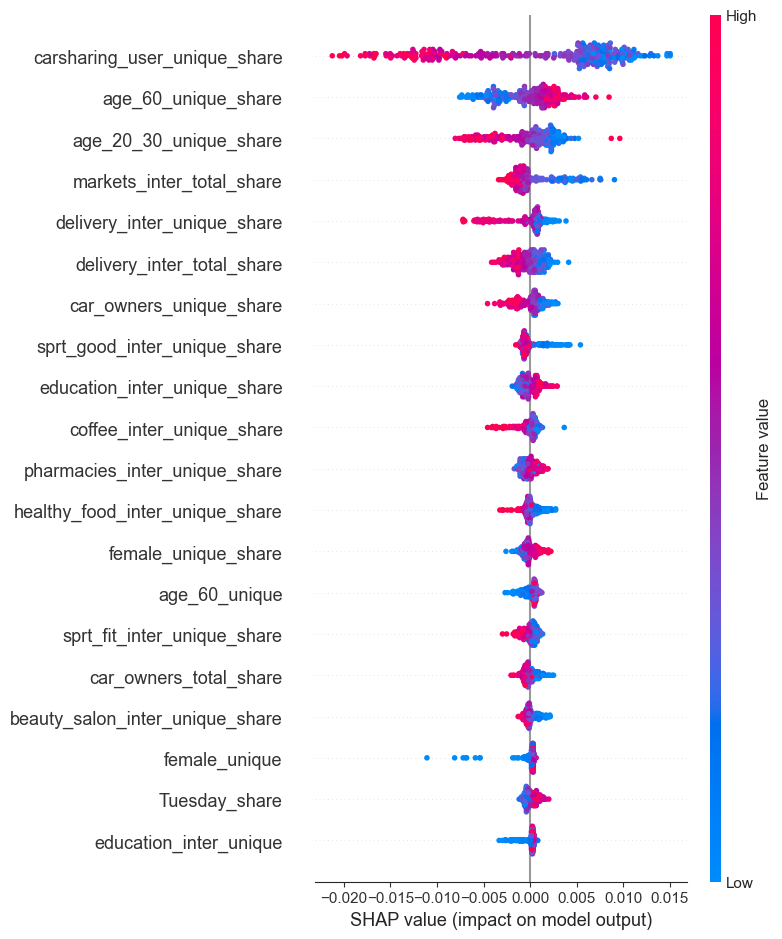

Target: salary_3_unique_share
Best Model: RandomForestRegressor
Metrics: {'R2': -0.009134775615059931, 'MAE': 0.0360928674418418, 'MAPE': 17.78064812435462}


 98%|===================| 300/306 [00:18<00:00]        

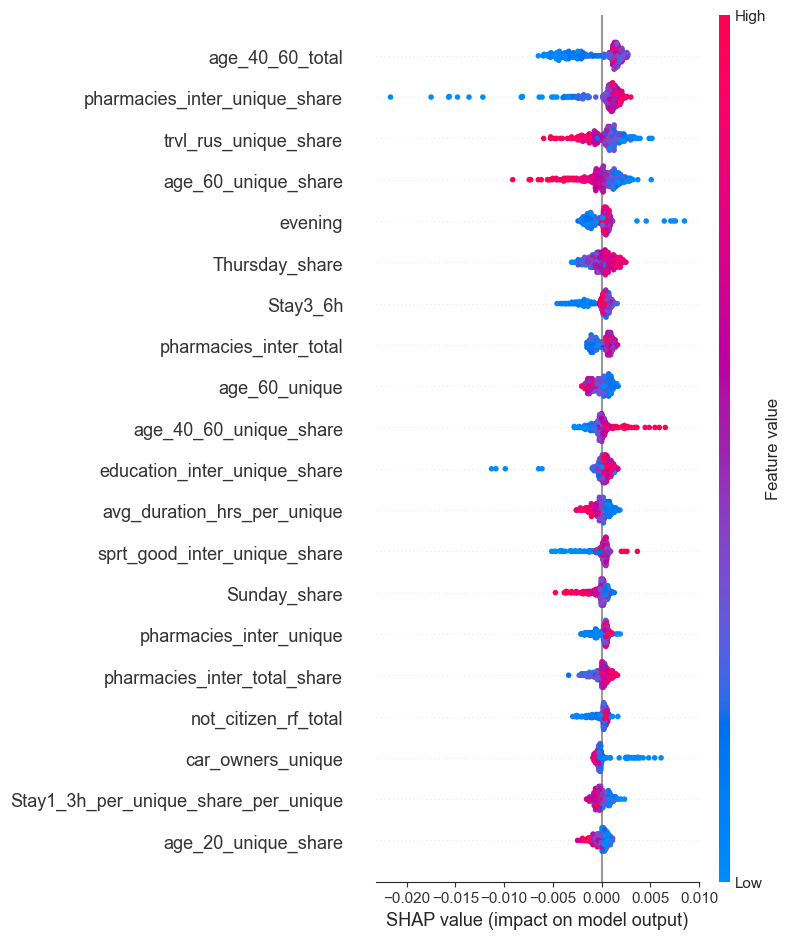

Target: salary_4_unique_share
Best Model: RandomForestRegressor
Metrics: {'R2': 0.05514386251840142, 'MAE': 0.03310064632148748, 'MAPE': 20.016997137979345}


 99%|===================| 304/306 [00:18<00:00]        

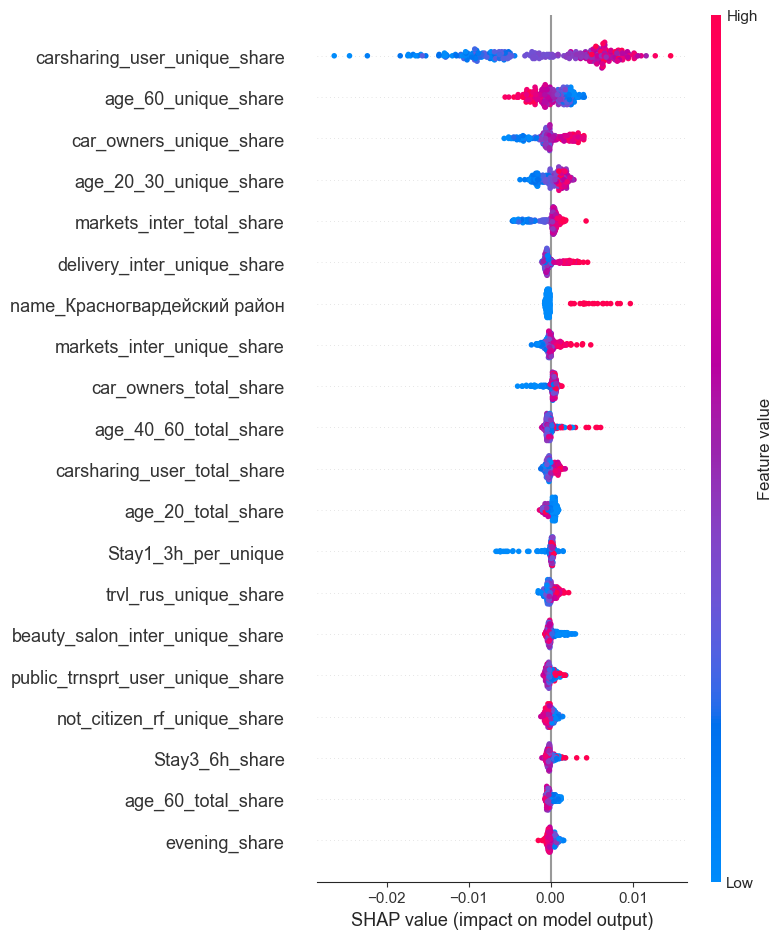

Target: salary_5_unique_share
Best Model: RandomForestRegressor
Metrics: {'R2': 0.38370642386084697, 'MAE': 0.03556569743544745, 'MAPE': 24.92136422818727}


 95%|=================== | 290/306 [00:15<00:00]       

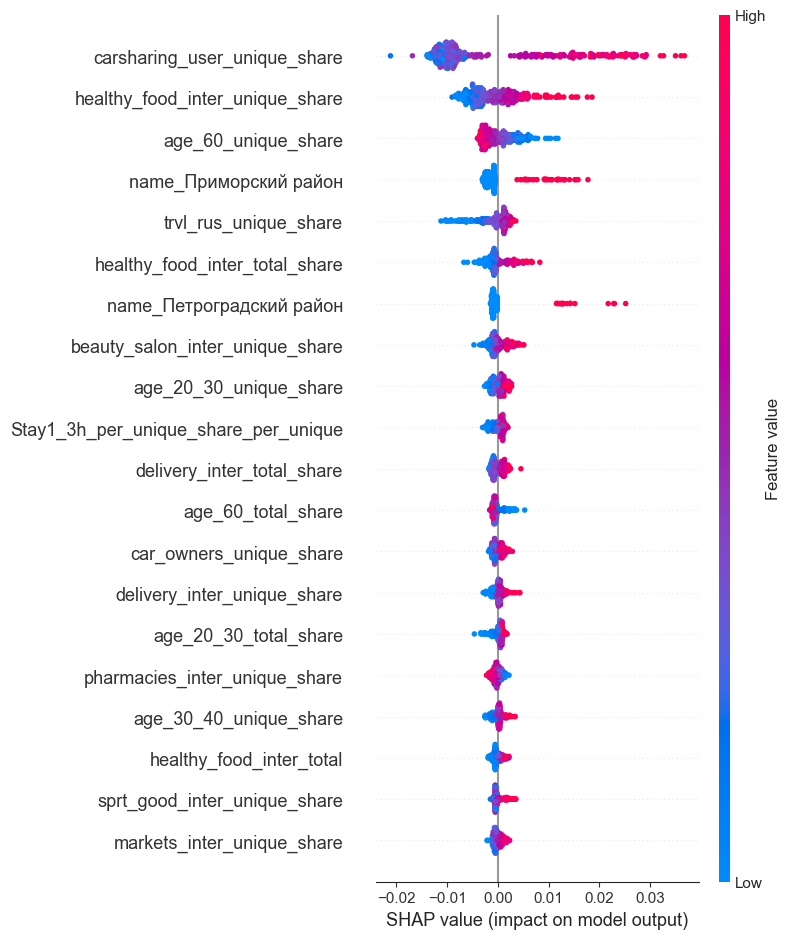

In [34]:
target_columns = ['salary_1_unique_share', 'salary_2_unique_share', 'salary_3_unique_share', 'salary_4_unique_share', 'salary_5_unique_share']

# Standardize the dataframe except the target columns
X = df_model_short.drop(target_columns, axis=1)
y = df_model_short[target_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model building and evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

for target in target_columns:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y[target], test_size=0.25, random_state=42)
    
    best_score = -float('inf')
    best_model = None
    best_metrics = {}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        if r2 > best_score:
            best_score = r2
            best_model = model
            best_metrics = {"R2": r2, "MAE": mae, "MAPE": mape}

    # Output the best model and its metrics for the current target
    print(f"Target: {target}")
    print(f"Best Model: {type(best_model).__name__}")
    print(f"Metrics: {best_metrics}")
    
    # Model interpretation using SHAP
    try:
        explainer = shap.Explainer(best_model, X_train)
        shap_values = explainer(X_test, check_additivity=False)  # Corrected placement of check_additivity
        # Plot SHAP values
        shap.summary_plot(shap_values, X_test, feature_names=X.columns)
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating SHAP values for {target}: {str(e)}")

**tuned variant in another file**